#Stock Market Analysis And Forecasting
A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

The task of stock prediction has always been a challenging
problem for statistics experts and
nance. The main reason
behind this prediction is buying stocks that are likely to
increase in price and then selling stocks that are probably
to fall. Generally, there are two ways for stock market prediction.
Fundamental analysis is one of them and relies on a
company's technique and fundamental information like market position, expenses and annual growth rates. The second
one is the technical analysis method, which concentrates on
previous stock prices and values.

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

#Datase
 1. Amazon
 2. Google
  

# Analysis - Google and Amazon datasets

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [3]:
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [4]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


After describing the google dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [5]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [6]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [7]:
google.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [8]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [9]:
amazon.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


Also same for the Amazon dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [10]:
amazon.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [11]:
amazon.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [12]:
fig = px.histogram(google,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(google,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.scatter(google,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

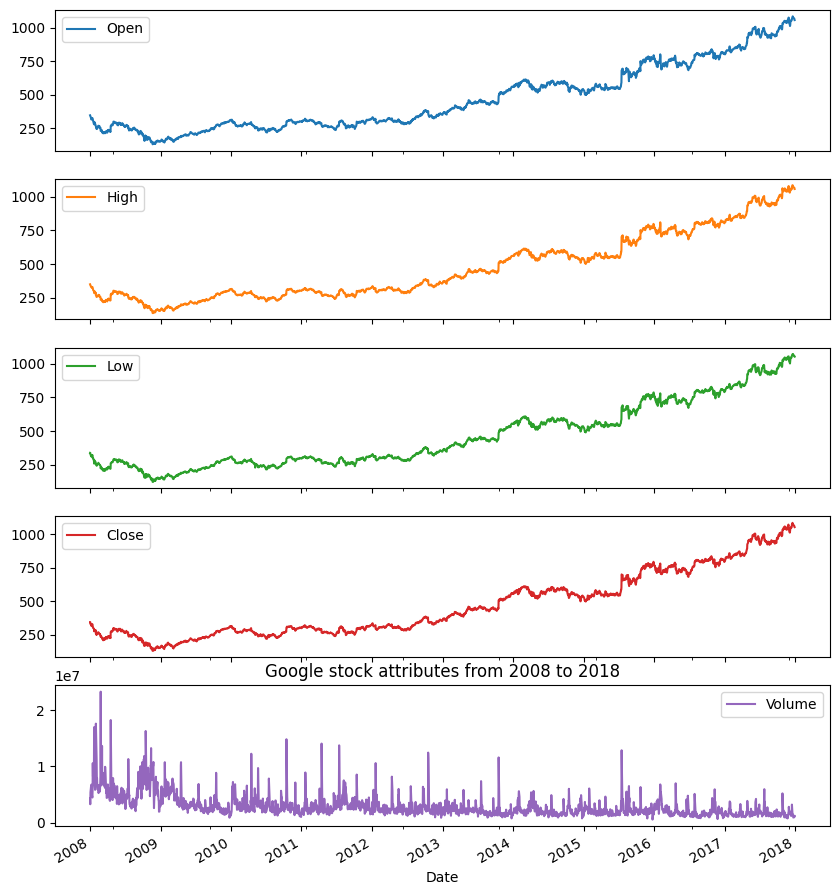

In [15]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

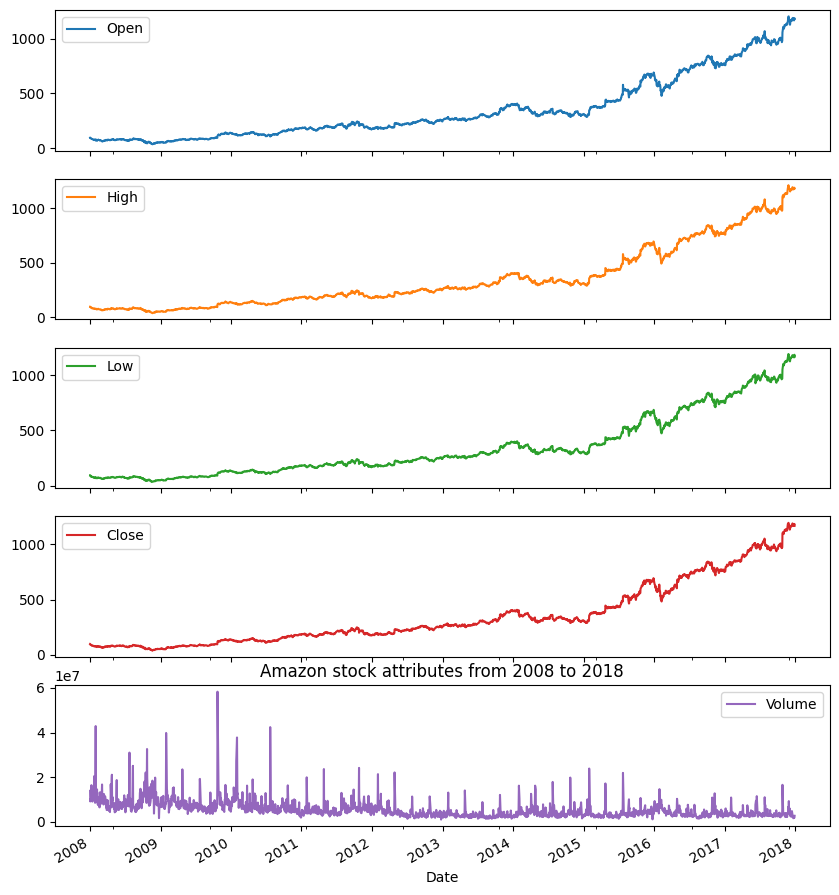

In [16]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018')
plt.show()

###High plot

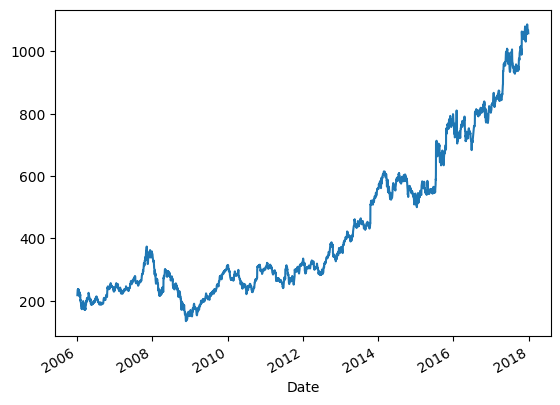

In [17]:
# Plotting before normalization
google.High.plot()
# microsoft.High.plot()
# amazon.High.plot()
# ibm.High.plot()
# plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

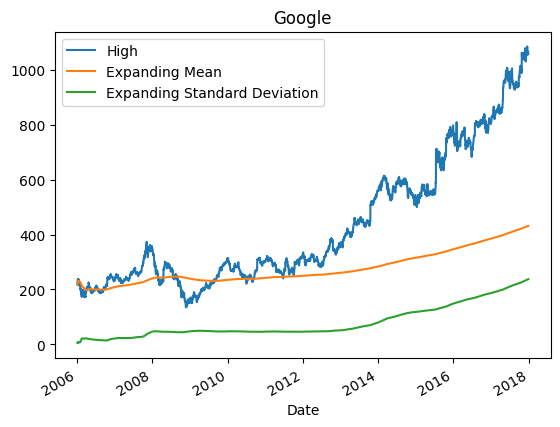

In [18]:
# Expanding window functions
google_mean = google.High.expanding().mean()
google_std = google.High.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

Same for Google data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. But it was not an as huge loss as Amazon.

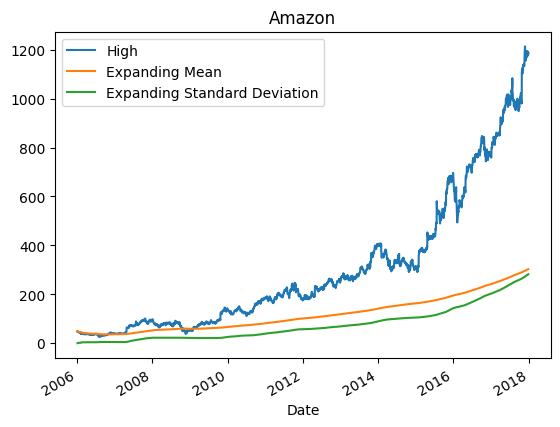

In [19]:
# Expanding window functions
amazon_mean = amazon.High.expanding().mean()
amazon_std = amazon.High.expanding().std()
amazon.High.plot()
amazon_mean.plot()
amazon_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon')
plt.show()

For Amazon's "High" value the case is different they also face loss in 2009 but for a very little margin. And after that their growth is in exponential order.

##Here we can see every company faced a loss in 2009, maybe that's because of the economic slowdown.

###Close

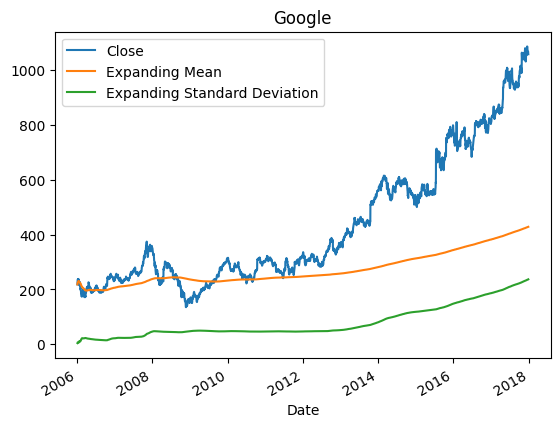

In [20]:
# Expanding window functions
google_mean = google.Close.expanding().mean()
google_std = google.Close.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

In [21]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.8 MB/s eta 0:00:00


In [22]:
from pylab import rcParams
import statsmodels.api as sm

#Training and Prediction


##Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


##GRU Model:
Gated recurrent unit  is essentially a simplified LSTM. It has
the exact same role in the network. The main difference is in the number of
gates and weights — GRU is somewhat simpler. It has 2 gates. Since it does
not have an output gate, there is no control over the memory content. The
update gate controls the information flow from the previous activation, and
the addition of new information as well, while the reset gate is inserted
into the candidate activation.



<img src='https://d2l.ai/_images/gru-1.svg' />


By using GRU time series forecasting we will forcaste and check.

## Amazon

In [23]:

filepath = 'AMZN_2006-01-01_to_2018-01-01.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


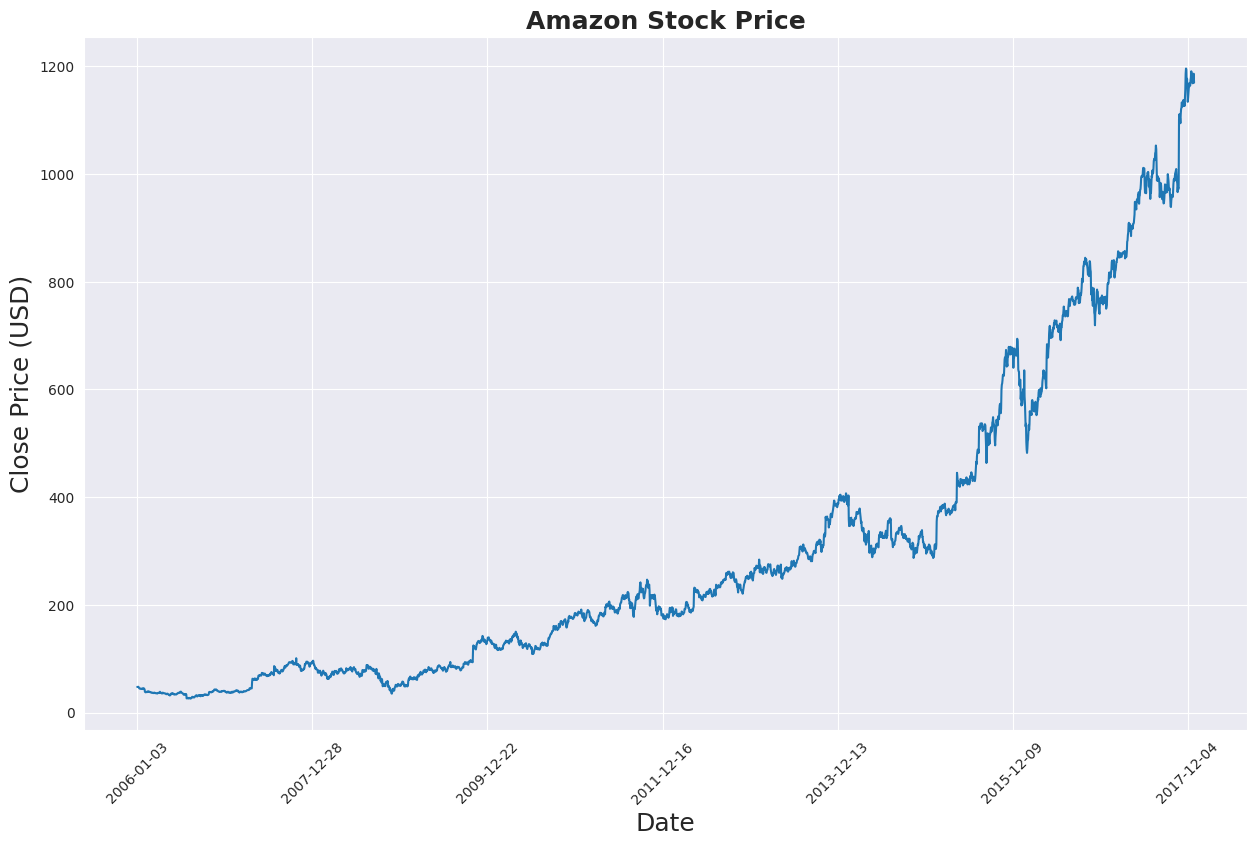

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [27]:
price_amazon = data_amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

<ipython-input-28-aa33d90e1d28>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:

def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [30]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [31]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [32]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [33]:

class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [34]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [35]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.5019687414169312
Epoch  1 MSE:  0.18170826137065887
Epoch  2 MSE:  0.022198619320988655
Epoch  3 MSE:  0.19123901426792145
Epoch  4 MSE:  0.0705493837594986
Epoch  5 MSE:  0.022124534472823143
Epoch  6 MSE:  0.0513320118188858
Epoch  7 MSE:  0.07626429200172424
Epoch  8 MSE:  0.07443074136972427
Epoch  9 MSE:  0.05644238740205765
Epoch  10 MSE:  0.03624432906508446
Epoch  11 MSE:  0.023565737530589104
Epoch  12 MSE:  0.02223038114607334
Epoch  13 MSE:  0.029276635497808456
Epoch  14 MSE:  0.03673297166824341
Epoch  15 MSE:  0.037795767188072205
Epoch  16 MSE:  0.03213911131024361
Epoch  17 MSE:  0.02447395958006382
Epoch  18 MSE:  0.019461698830127716
Epoch  19 MSE:  0.0186839047819376
Epoch  20 MSE:  0.020860107615590096
Epoch  21 MSE:  0.023539910092949867
Epoch  22 MSE:  0.02465098164975643
Epoch  23 MSE:  0.023328041657805443
Epoch  24 MSE:  0.02004566229879856
Epoch  25 MSE:  0.01623101346194744
Epoch  26 MSE:  0.01352047361433506
Epoch  27 MSE:  0.012854443863034

In [36]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

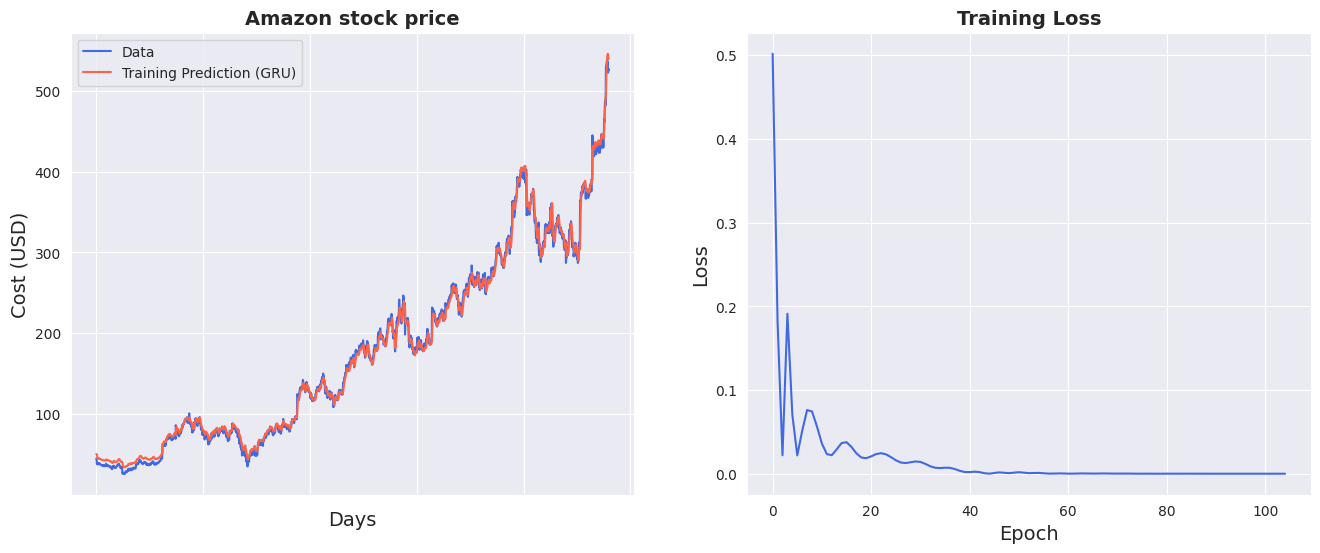

In [37]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [39]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 6.50 RMSE
Test Score: 26.79 RMSE


In [40]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_amazon)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_amazon)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_amazon)-1, :] = y_test_pred

original = scaler.inverse_transform(price_amazon['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [41]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Amazon Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

## Google

In [42]:
filepath = 'GOOGL_2006-01-01_to_2018-01-01.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [47]:
price_google = data_google[['Close']]
price_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_google['Close'] = scaler.fit_transform(price_google['Close'].values.reshape(-1,1))

<ipython-input-48-7909ce3880b7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_google, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [50]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [51]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [52]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.6308059692382812
Epoch  1 MSE:  0.2275964319705963
Epoch  2 MSE:  0.059253331273794174
Epoch  3 MSE:  0.1824452131986618
Epoch  4 MSE:  0.10028143227100372
Epoch  5 MSE:  0.045510873198509216
Epoch  6 MSE:  0.06405670195817947
Epoch  7 MSE:  0.08856689929962158
Epoch  8 MSE:  0.08569951355457306
Epoch  9 MSE:  0.06199534609913826
Epoch  10 MSE:  0.03619364649057388
Epoch  11 MSE:  0.025814928114414215
Epoch  12 MSE:  0.03636980429291725
Epoch  13 MSE:  0.048459168523550034
Epoch  14 MSE:  0.040757931768894196
Epoch  15 MSE:  0.02276328206062317
Epoch  16 MSE:  0.012548710219562054
Epoch  17 MSE:  0.014219716191291809
Epoch  18 MSE:  0.02024250663816929
Epoch  19 MSE:  0.021581178531050682
Epoch  20 MSE:  0.014925932511687279
Epoch  21 MSE:  0.004883590620011091
Epoch  22 MSE:  0.0009023360908031464
Epoch  23 MSE:  0.007352760527282953
Epoch  24 MSE:  0.012700993567705154
Epoch  25 MSE:  0.007447435520589352
Epoch  26 MSE:  0.001640352071262896
Epoch  27 MSE:  0.0031406

In [53]:

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

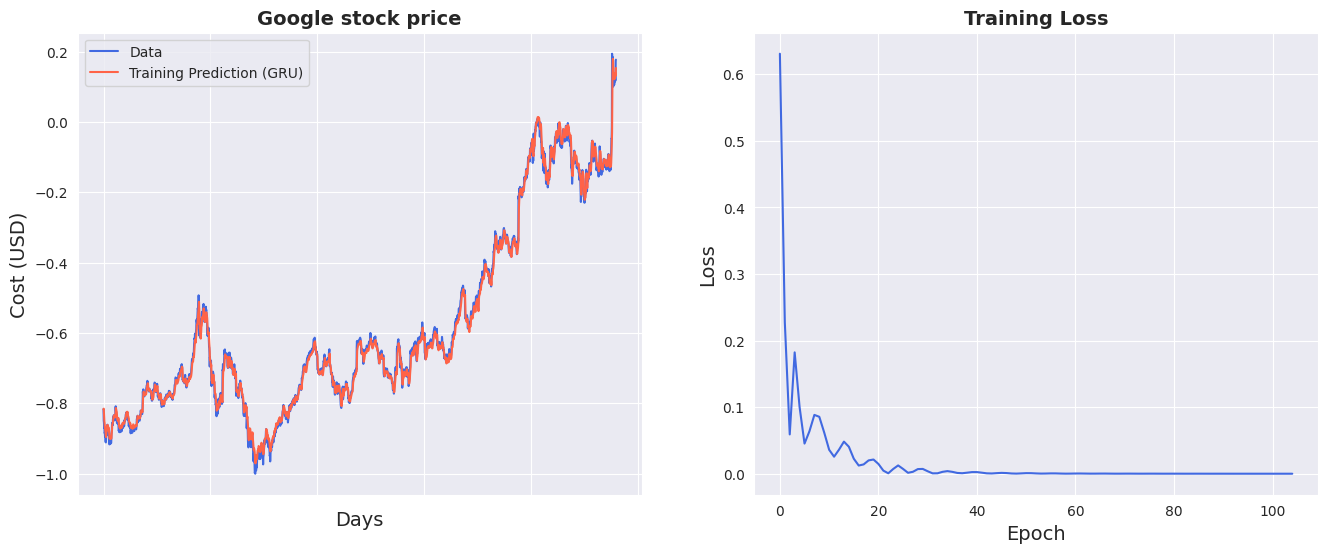

In [54]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Google stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [55]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.02 RMSE
Test Score: 0.05 RMSE


In [56]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [57]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Google Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()